# Machine Learning Foundation

## Section 1, Part c: EDA Lab

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.

In [3]:
import os
import numpy as np
import pandas as pd

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [ ]:
filepath = "iris_data.csv"
data = pd.read_csv(filepath)
data.head()

In [6]:
print("# Number of rows:",data.shape[0])
print("# Column names",data.columns.tolist())
print("# Data types",data.dtypes,sep='\n')

# Number of rows: 150
# Column names ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
# Data types
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [7]:
data['species'] = data.species.str.replace('Iris-', '')
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [8]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
stats_df = data.describe()
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [17]:
# seprately
data.groupby('species').mean()
data.groupby('species').median()

# aggeragate
data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [ ]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)
### END SOLUTION

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

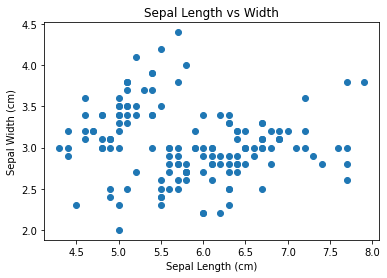

In [28]:
ax = plt.axes()
ax.scatter(data.sepal_length, data.sepal_width)
ax.set(xlabel='Sepal Length (cm)', ylabel='Sepal Width (cm)', title='Sepal Length vs Width')
ax

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

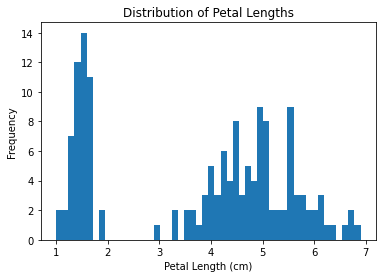

In [36]:
ax = plt.axes()
ax.hist(data.petal_length, bins=50)
ax.set(xlabel='Petal Length (cm)',ylabel='Frequency',title='Distribution of Petal Lengths')
ax

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

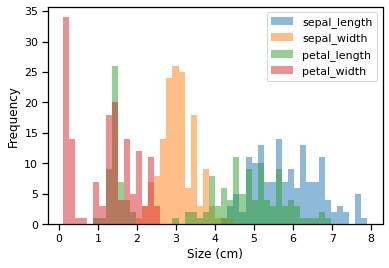

In [45]:
import seaborn as sns
sns.set_context('notebook')
ax = data.plot.hist(bins=50, alpha=0.5)
ax.set_xlabel('Size (cm)');

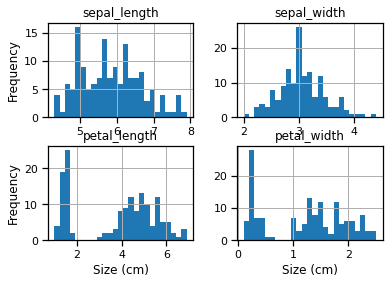

In [42]:
axList = data.hist(bins=25)

for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

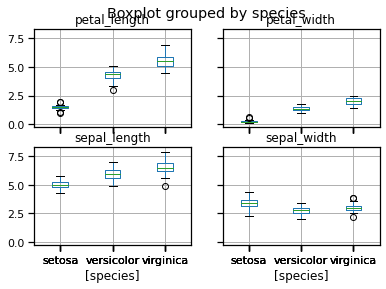

In [43]:
data.boxplot(by='species');

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [57]:
data.set_index('species').stack().to_frame()

0
species                    
setosa    sepal_length  5.1
          sepal_width   3.5
          petal_length  1.4
          petal_width   0.2
          sepal_length  4.9
...                     ...
virginica petal_width   2.3
          sepal_length  5.9
          sepal_width   3.0
          petal_length  5.1
          petal_width   1.8

[600 rows x 1 columns]

In [50]:
# Reshape the data so there is only a single measurement in each column
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


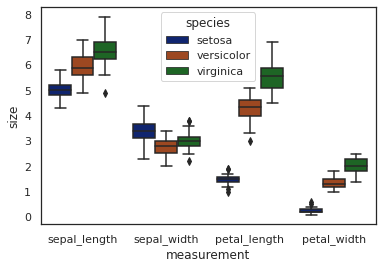

In [51]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size',hue='species', data=plot_data);

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

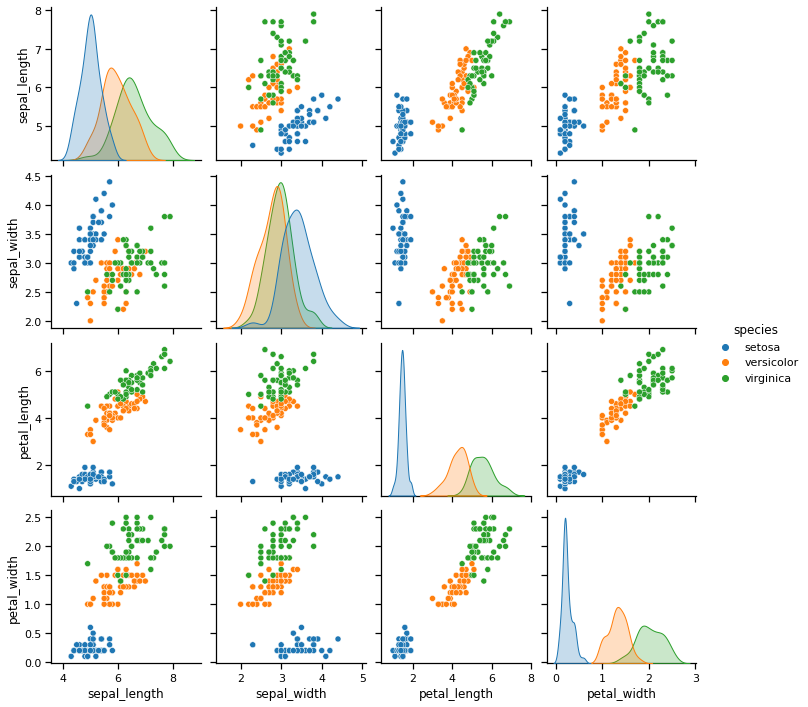

In [47]:
sns.set_context('notebook')
sns.pairplot(data, hue='species');

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/0zProject/CourserA/ibm-exploratory-data-analysis-for-machine-learning/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/0zProject/CourserA/ibm-exploratory-data-analysis-for-machine-learning
